In [36]:
# History Data Code


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import os

In [37]:
# Section 1: 

china_data = {
    "TimeFrame": [x for x in range(1952, 1981)],
    "National_Income" : [65.4*(1.062**x) for x in range(0, 14)] + [151.0*(1.05)**x for x in range(0,10)] + [245.6*(1.084)**x for x in range(0,4)] + [338.9],
    "Percent_Income" : [1.062 for x in range (0, 14)] + [1.05 for x in range (0, 10)] + [1.084 for x in range (0, 4)] + [1.084],
    "Industrial_Production" : [27.5*(1.126)**x for x in range(0, 14)] + [144.8*(1.085)**x for x in range(0,10)] + [326.10*(1.109)**x for x in range(0,4)] + [499.20],
    "Heavy_Industry" : "Skip",
    "Light_Industry" : "Skip",
    "Agriculture" : [63.6*(1.029)**x for x in range(0, 14)] + [94.7*(1.034)**x for x in range(0,10)] + [131.70*(1.054)**x for x in range(0,4)] + [162.7],
    "Birth_Rate" : [22.5*(1.022)**x for x in range(0, 14)] + [24.5*(1.022)**x for x in range(0,10)] + [26.5*(1.022)**x for x in range(0,4)] + [28.5],

}

In [38]:
for key, item in china_data.items():
    print(key, len(item))

TimeFrame 29
National_Income 29
Percent_Income 29
Industrial_Production 29
Heavy_Industry 4
Light_Industry 4
Agriculture 29
Birth_Rate 29


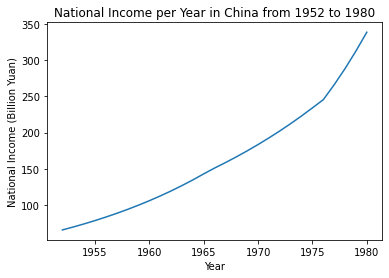

In [39]:
# plot National Income starting with datapoint labels
plt.plot(china_data["TimeFrame"], china_data["National_Income"])
plt.title("National Income per Year in China from 1952 to 1980")
plt.xlabel("Year")
plt.ylabel("National Income (Billion Yuan)")
plt.show()

In [40]:
# find integral of National Income
china_data["National_Income_Integral"] = np.cumsum(china_data["National_Income"])

# find integral of Percent_Income
china_data["Percent_Income_Integral"] = np.cumsum(china_data["Percent_Income"])



In [41]:
len(range(1952, 1981))

29

In [42]:
# open csv with pandas
df = pd.read_csv("birth-death-china-great-leap-forward-famine.csv")
df = df[df.Entity == "China"]
df = df[df.Year >= 1952]
df = df[df.Year <= 1980]

# add data to dictionary
china_data["Birth_Rate"] = [float(x) for x in df["International Historical Statistics (Births per 1,000) (Brian Mitchell (2013))"].tolist()]
china_data["Death_Rate"] = [float(x) for x in df["International Historical Statistics (Deaths per 1,000) (Brian Mitchell (2013))"].tolist()]



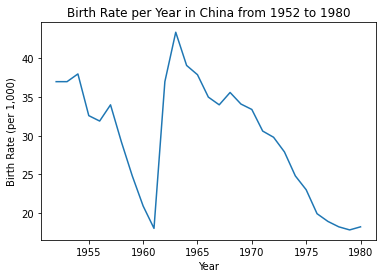

In [43]:
# plot Birth Rate
plt.plot(china_data["TimeFrame"], china_data["Birth_Rate"])
plt.title("Birth Rate per Year in China from 1952 to 1980")
plt.xlabel("Year")
plt.ylabel("Birth Rate (per 1,000)")
plt.show()


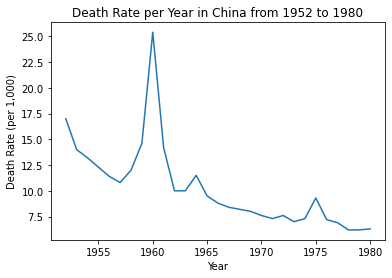

In [44]:
#plot Death Rate
plt.plot(china_data["TimeFrame"], china_data["Death_Rate"])
plt.title("Death Rate per Year in China from 1952 to 1980")
plt.xlabel("Year")
plt.ylabel("Death Rate (per 1,000)")
plt.show()


In [45]:
# find integral of Birth Rate and death rate
china_data["Birth_Rate_Integral"] = np.cumsum(china_data["Birth_Rate"])[-1]
china_data["Death_Rate_Integral"] = np.cumsum(china_data["Death_Rate"])[-1]

In [46]:
# normalize birth rate and death rate
china_data["Death_Rate_Normalized"] = [x/china_data["Death_Rate_Integral"] for x in china_data["Death_Rate"]]
china_data["Birth_Rate_Normalized"] = [x/china_data["Birth_Rate_Integral"] for x in china_data["Birth_Rate"]]

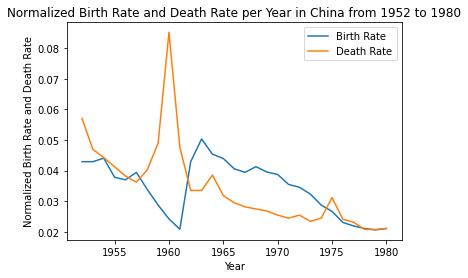

In [47]:
# plot normalized birth rate and death rate
plt.plot(china_data["TimeFrame"], china_data["Birth_Rate_Normalized"])
plt.plot(china_data["TimeFrame"], china_data["Death_Rate_Normalized"])
plt.title("Normalized Birth Rate and Death Rate per Year in China from 1952 to 1980")
plt.xlabel("Year")
plt.ylabel("Normalized Birth Rate and Death Rate")
plt.legend(["Birth Rate", "Death Rate"])
plt.show()

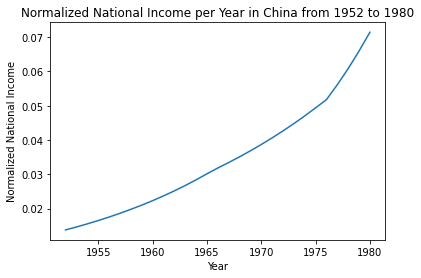

In [48]:
# Normalize National Income
china_data["National_Income_Normalized"] = [x/china_data["National_Income_Integral"][-1] for x in china_data["National_Income"]]
china_data["Percent_Income_Normalized"] = [x/china_data["Percent_Income_Integral"][-1] for x in china_data["Percent_Income"]]
plt.plot(china_data["TimeFrame"], china_data["National_Income_Normalized"])
plt.title("Normalized National Income per Year in China from 1952 to 1980")
plt.xlabel("Year")
plt.ylabel("Normalized National Income")
plt.show()

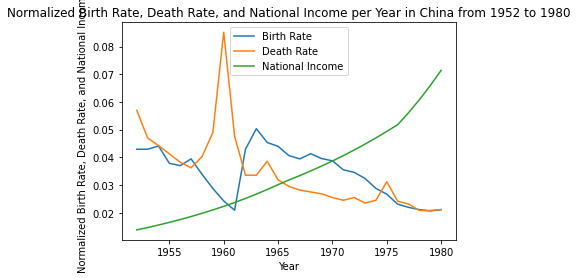

In [49]:
# Plot all data
plt.plot(china_data["TimeFrame"], china_data["Birth_Rate_Normalized"])
plt.plot(china_data["TimeFrame"], china_data["Death_Rate_Normalized"])
plt.plot(china_data["TimeFrame"], china_data["National_Income_Normalized"])
plt.title("Normalized Birth Rate, Death Rate, and National Income per Year in China from 1952 to 1980")
plt.xlabel("Year")
plt.ylabel("Normalized Birth Rate, Death Rate, and National Income")
plt.legend(["Birth Rate", "Death Rate", "National Income"])
plt.show()


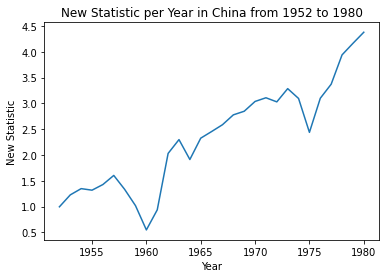

In [50]:
# plot new statistic = Birth Rate + National Income / Death Rate
china_data["New_Statistic"] = [(china_data["Birth_Rate_Normalized"][x] + china_data["National_Income_Normalized"][x]) / china_data["Death_Rate_Normalized"][x] for x in range(0, len(china_data["TimeFrame"]))]
plt.plot(china_data["TimeFrame"], china_data["New_Statistic"])
plt.title("New Statistic per Year in China from 1952 to 1980")
plt.xlabel("Year")
plt.ylabel("New Statistic")
plt.show()


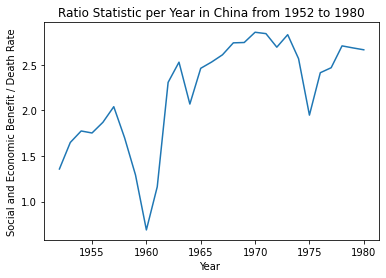

In [61]:
# plot new statistic = Birth Rate + National Income / Death Rate
china_data["New_Statistic"] = [(china_data["Birth_Rate_Normalized"][x] + china_data["Percent_Income_Normalized"][x]) / china_data["Death_Rate_Normalized"][x] for x in range(0, len(china_data["TimeFrame"]))]
plt.plot(china_data["TimeFrame"], china_data["New_Statistic"])
plt.title("Ratio Statistic per Year in China from 1952 to 1980")
plt.xlabel("Year ")
plt.ylabel("Social and Economic Benefit / Death Rate")
plt.show()


In [ ]:
malcolm => clam mol